# BTC Price PlotSMA
Este notebook descarga y grafica el precio de BTC y le añade una media movil simple (SMA) para observar la tendencia suavizada del activo.

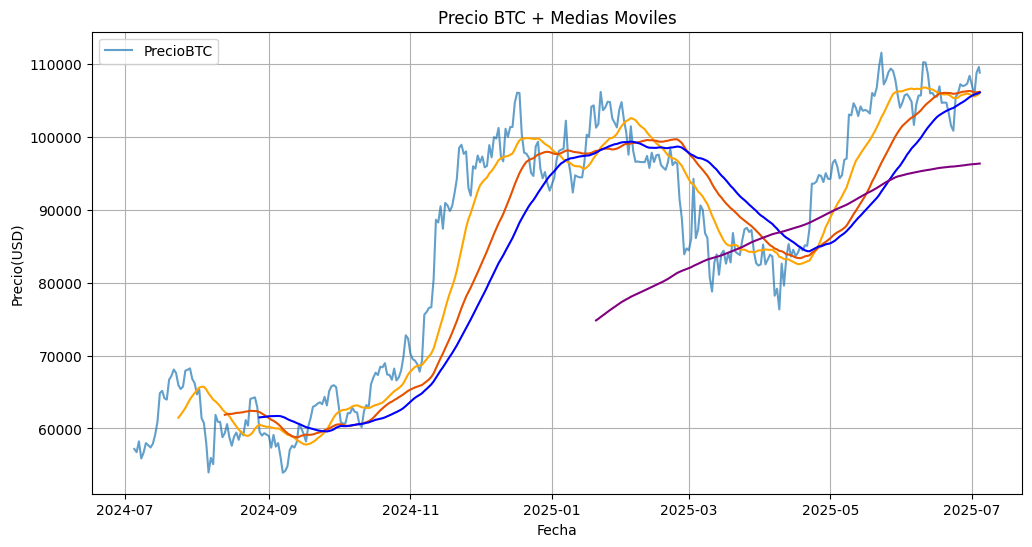

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos (ultimos 365 dias de BTC en USD)
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart'
params = {'vs_currency': 'usd', 'days': '365'}
response = requests.get(url, params=params).json()

# Convertir a DataFrame
prices = pd.DataFrame(response['prices'], columns=['timestamp', 'price'])
prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')

# Calcular media movil de:
prices['SMA_20'] = prices['price'].rolling(window=20).mean()
prices['SMA_40'] = prices['price'].rolling(window=40).mean()
prices['SMA_55'] = prices['price'].rolling(window=55).mean()
prices['SMA_200'] = prices['price'].rolling(window=200).mean()

# Graficar
plt.figure(figsize=(12,6))

plt.plot(prices['timestamp'], prices['price'], label='PrecioBTC', alpha=0.7)

plt.plot(prices['timestamp'], prices['SMA_20'], color='orange')
plt.plot(prices['timestamp'], prices['SMA_40'], color='#e65100')
plt.plot(prices['timestamp'], prices['SMA_55'], color='blue')
plt.plot(prices['timestamp'], prices['SMA_200'], color='purple')

plt.title('Precio BTC + Medias Moviles')

plt.xlabel('Fecha')
plt.ylabel('Precio(USD)')
plt.legend()
plt.grid(True)
plt.show()